In [1]:
cd

C:\Users\Karthik


In [2]:
cd "C:\Users\Karthik\Pictures\LinkedIn tasks\Datasets"

C:\Users\Karthik\Pictures\LinkedIn tasks\Datasets


In [3]:
#Load the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Plot styling
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [4]:
dataset=pd.read_csv('IncomeExpenditure.csv')

In [17]:
dataset.head()

,INCOME,SPEND
0,480332,117848
1,198235,67766
2,82785,61609
3,107589,78189
4,189322,94625


In [5]:
len(dataset)

41544

In [6]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
INCOME,41544.0,247555.584802,286880.522653,11285.0,104895.00,164079.5,291138.5,11815988.0
SPEND,41544.0,85099.158194,51637.947682,2947.0,51017.25,72985.5,105635.5,827565.0


Text(0.5, 0, 'Income')

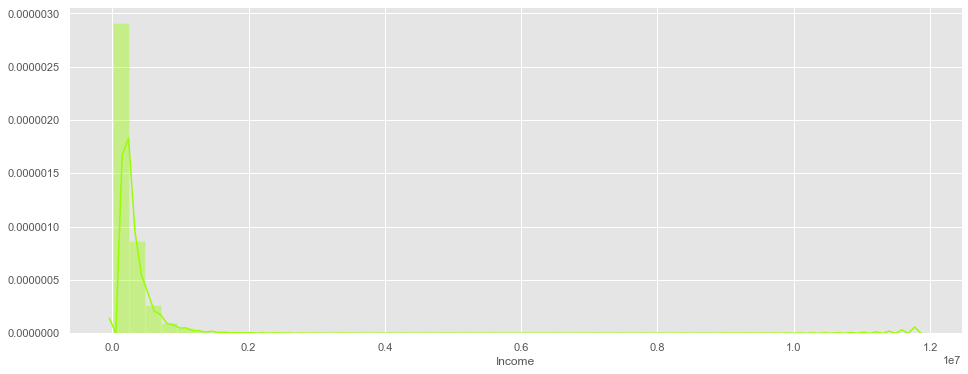

In [33]:
#Visualising the data
plt.figure(figsize=(16, 6))
plot_income = sns.distplot(dataset["INCOME"],color = '#97FE00')
plt.xlabel('Income')

Text(0.5, 0, 'Spend')

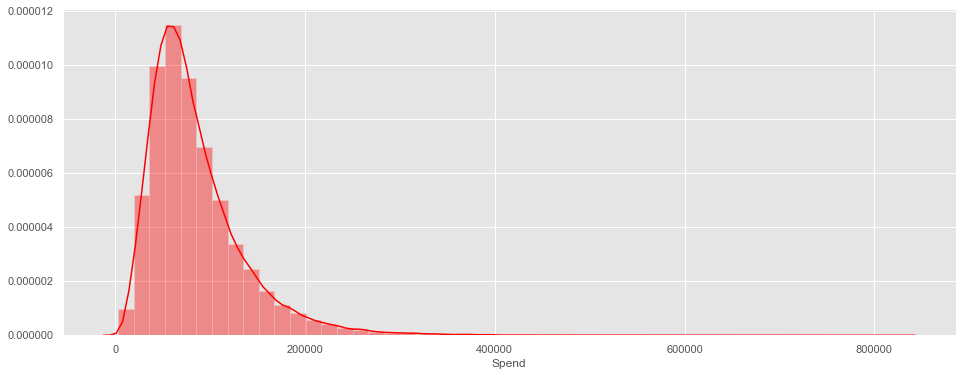

In [35]:
plt.figure(figsize=(16, 6))
plot_spend = sns.distplot(dataset["SPEND"],color = '#FE0000')
plt.xlabel('Spend')

Text(0.5, 0, 'Ratio of Spend / Income')

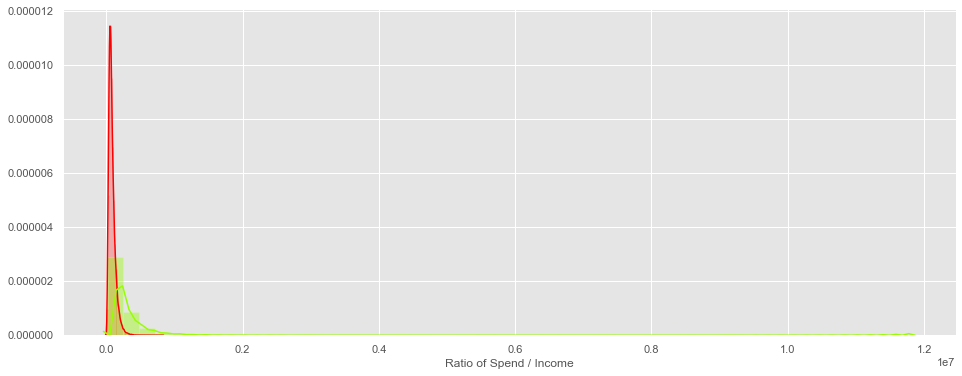

In [36]:
#Visualising the data
plt.figure(figsize=(16, 6))
plot_spend = sns.distplot(dataset["SPEND"],color = '#FE0000')
plot_income = sns.distplot(dataset["INCOME"],color = '#97FE00')
plt.xlabel('Ratio of Spend / Income')

[(0, 420)]

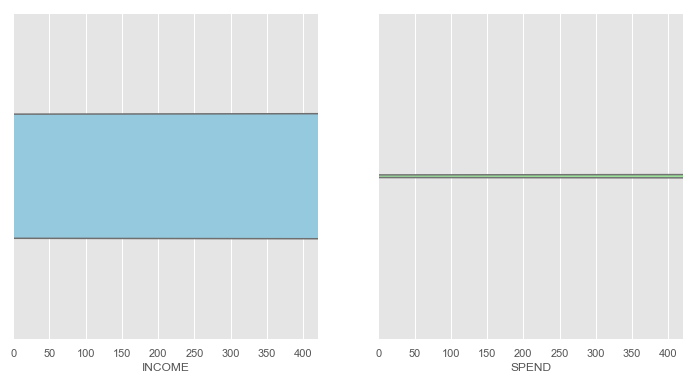

In [21]:
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True)
v1 = sns.violinplot(data=dataset, x='INCOME', color="skyblue",ax=axes[0])
v2 = sns.violinplot(data=dataset, x='SPEND',color="lightgreen", ax=axes[1])
v1.set(xlim=(0,420))

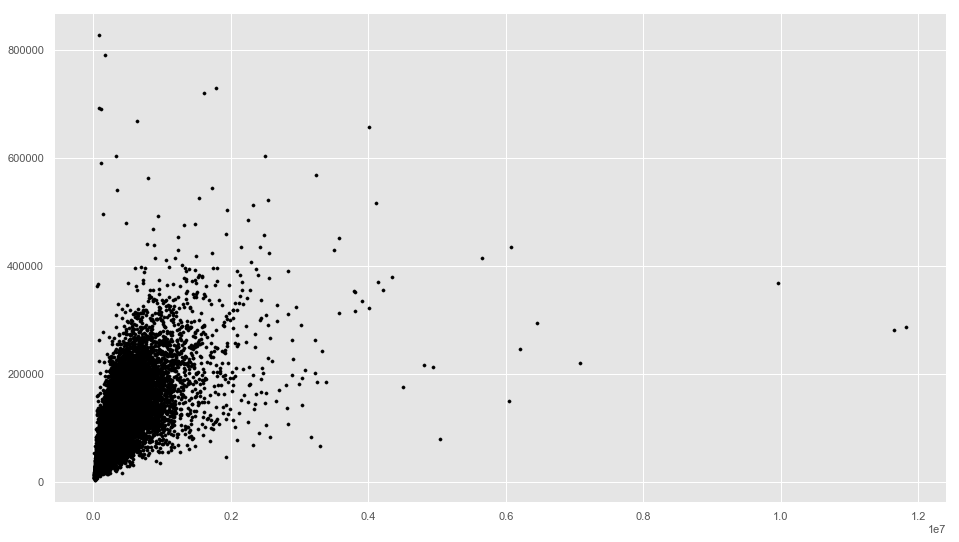

In [22]:
# Plotting the values to understand the spread
Income = dataset['INCOME'].values
Spend = dataset['SPEND'].values
X = np.array(list(zip(Income, Spend)))
plt.scatter(Income, Spend, c='black', s=10)

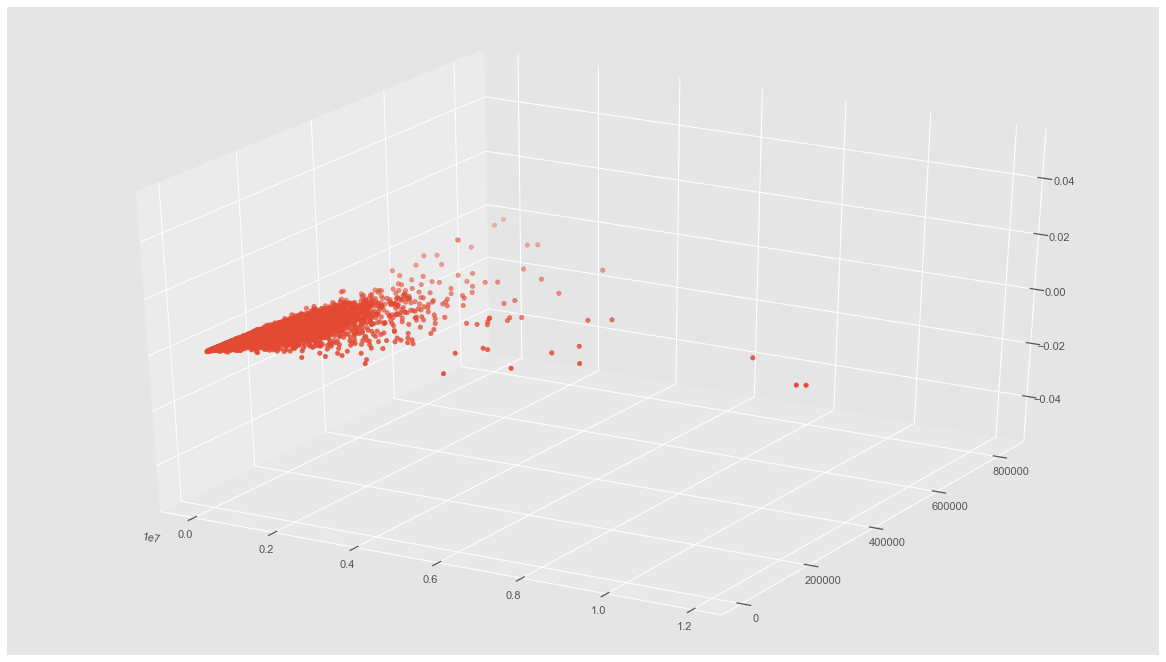

In [23]:
##plot in 3D space
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1])

In [24]:
X=dataset.iloc[:,[0,1]].values

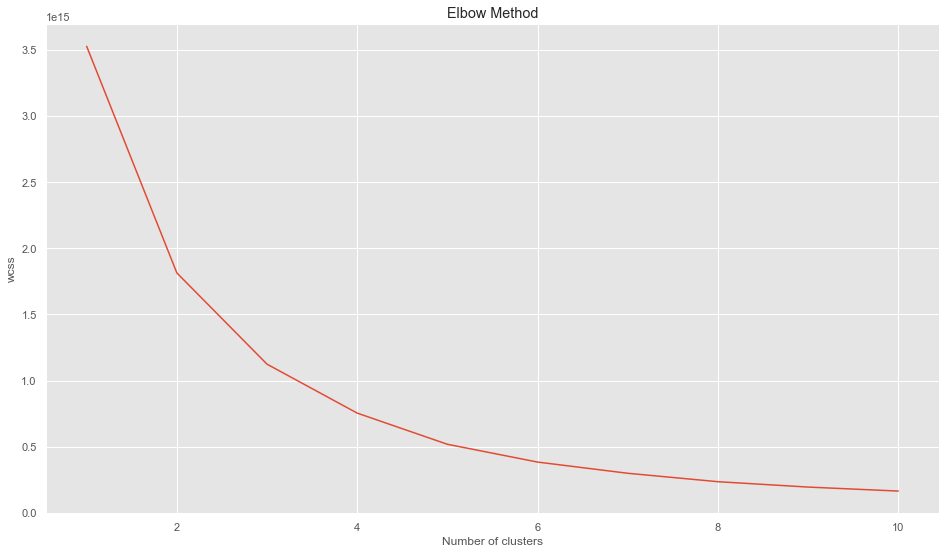

In [25]:
#Using the elbow method to find the ideal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [26]:
##Fitting kmeans to the dataset
km=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(X)

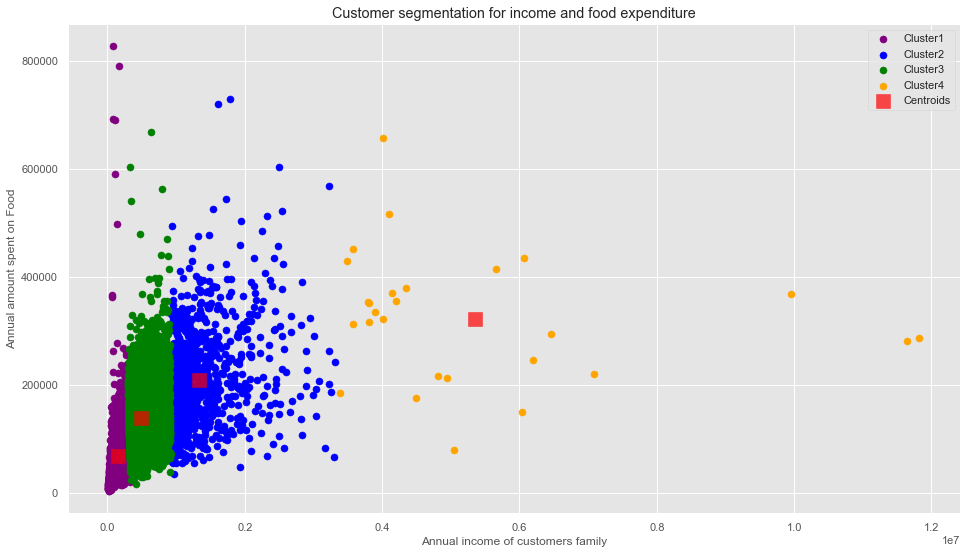

In [28]:
#Visualising the clusters
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='orange',label='Cluster4')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segmentation for income and food expenditure')
plt.xlabel('Annual income of customers family')
plt.ylabel('Annual amount spent on Food')
plt.legend()
plt.show()